# 1. Perkenalan

Nama: Bintang Muhammad <br>
Course: Data Science <br>
Batch: 6 <br>

## About The Data

- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
- Target variable: Will the client subscribe to a term deposit or not?(Variable y)
- Objective: create multiple machine learning models to predict Target Variable, and finding the best model.

# 2. Import Libraries

In [218]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn2pmml import PMMLPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix,plot_confusion_matrix

# 3.  Data Loading

In [219]:
#load data
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [220]:
#view data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Data consists of categorical and numerical features
- Data consists of a persons's profile

# 4. Data Cleaning

In [221]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- The data consists of 21 columns and 41188 rows
- The data types are float(5 features), integer(5 features), object(11 features)
- There is no null values in the data

In [222]:
#check null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- no null values

In [223]:
#check duplicate rows
df.duplicated().sum()

12

- there is duplicate rows on the data

In [224]:
#drop duplicate rows
df=df.drop_duplicates()

In [225]:
#check again
df.duplicated().sum()

0

- No duplicate values after dropping

<AxesSubplot:>

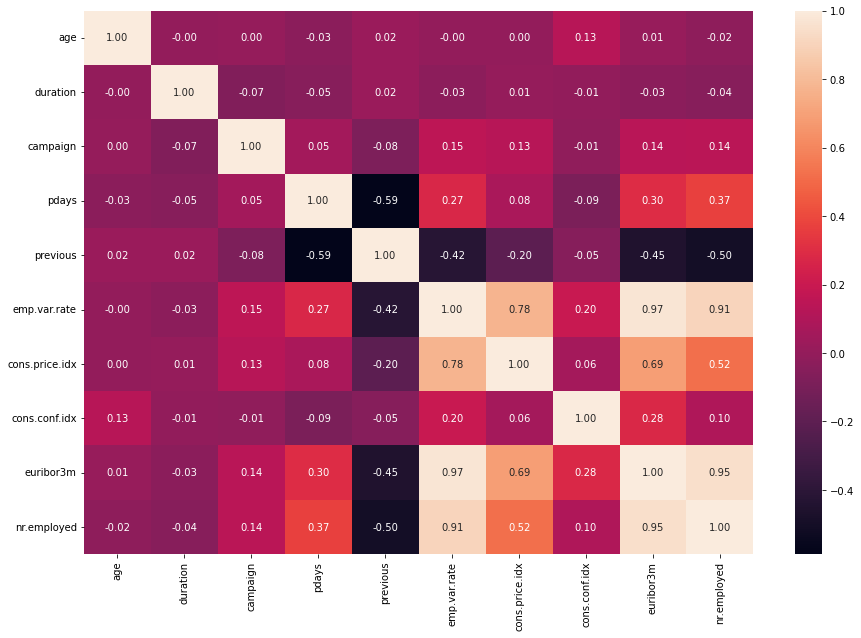

In [226]:
#view heatmap correlation to check redundant datas
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

- emp.var.rate is redudnant with 2 features: nr.employed and cons.price index, so i will drop it.
- euribor3m is also redundant with 2 features: nr.employed and emp.var.rate, so i will drop it

In [227]:
#drop columns
df=df.drop(columns=['euribor3m','emp.var.rate'])

In [228]:
#change age data type
df=df.astype({'age':'int64'})

In [229]:
#rename features
df=df.rename(columns={'cons.price.idx':'cpi','cons.conf.idx':'cci','nr.employed':'nr.emp','y':'subs.td','default':'has.credit'})

In [230]:
#view data
df.head()

,age,job,marital,education,has.credit,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cpi,cci,nr.emp,subs.td
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0,no


# 5. Data Exploration

| Variable | Definition | Example |
| ----------- | ----------- | ----------- | 
| Age (numeric)| age of the client | 55, 60 |
| Job | Type of job | admin, blue-collar, entrepreneur |
| Marital | Marital status | divorced, married, single |
| Education | Education of the client | illiterate, professional course, university degree |
|has.credit | Has credit in default? |'no', 'yes', 'unknown'|
|housing | Has housing loan? |'no', 'yes', 'unknown'|
|loan | Has personal loan? |'no', 'yes', 'unknown'|
|contact | Contact communication type |'cellular',' telephone'|
|month | Last contact month of year |'jan', 'feb', 'mar'|
|day_of_week | Last contact day of the week | 'mon', 'tue', 'wed'|
|duration | Last contact duration, in seconds | (numeric)|
|campaign | Number of contacts performed during this campaign and for this client| (numeric, includes last contact)|
|pdays | Number of days that passed by after the client was last contacted from a previous campaign | (numeric; 999 means client was not previously contacted)|
|previous | Number of contacts performed before this campaign and for this client | (numeric)|
|poutcome | Outcome of the previous marketing campaign |'failure','nonexistent','success'|
|cpi | Consumer Price Index - monthly indicator | (numeric)|
|cci | Consumer Confidence Index - monthly indicator | (numeric)|
|nr.emp | Number of employees - quarterly indicator | (numeric)|
|subs.td | Has the client subscribed a term deposit? | (binary: 'yes','no')|

In [231]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41176 non-null  int64  
 1   job          41176 non-null  object 
 2   marital      41176 non-null  object 
 3   education    41176 non-null  object 
 4   has.credit   41176 non-null  object 
 5   housing      41176 non-null  object 
 6   loan         41176 non-null  object 
 7   contact      41176 non-null  object 
 8   month        41176 non-null  object 
 9   day_of_week  41176 non-null  object 
 10  duration     41176 non-null  int64  
 11  campaign     41176 non-null  int64  
 12  pdays        41176 non-null  int64  
 13  previous     41176 non-null  int64  
 14  poutcome     41176 non-null  object 
 15  cpi          41176 non-null  float64
 16  cci          41176 non-null  float64
 17  nr.emp       41176 non-null  float64
 18  subs.td      41176 non-null  object 
dtypes: f

- The data consists of 19 columns and 41175 rows after cleaning
- The data types are float(5 features), integer(5 features), object(11 features)
- There is no null values in the data

In [232]:
#view stats
df.describe()

,age,duration,campaign,pdays,previous,cpi,cci,nr.emp
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,93.575720,-40.502863,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,0.578839,4.627860,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5228.100000


- Pdays, and CCI have a higher std than the mean,which means there is a high variability in the data.
- Mean > Median features: age, duration, campaign, previous, possibly positively skewed.
- Mean < Median features: pdays, cpi, cci, nr.emp, possibly negatively skewed
- Age, duration, campaign have a large distance from Q3 to max value, indicating a large range.

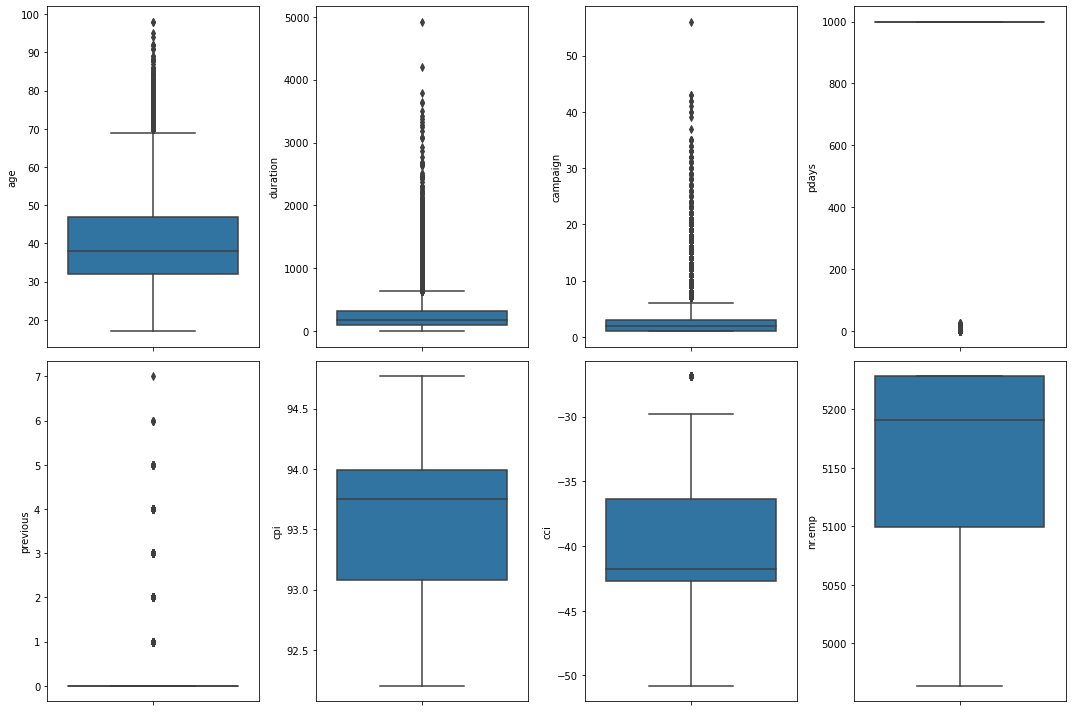

In [233]:
#select numerical features only
nums=df.select_dtypes(['int64','float64']).columns

#visualize data with boxplot
plt.figure(figsize=(15,10))
for i in range(0,len(nums)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[nums[i]],orient ='v')
    plt.tight_layout()

- Have outliers: Age, Previous, duration, campaign, pdays
- Does not have outliers: cpi, nr.emp

In [234]:
#took numerical data
nums2=df.select_dtypes(include=['int64','float64'])

#look for outliers in numerical data
for i, x in nums2.items():
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    xcol = x[(x <= q1 - 1.5 * iqr) | (x >= q3 + 1.5 * iqr)]
    perc = np.shape(xcol)[0] * 100.0/np.shape(nums2)[0]
    print("Column %s outliers = %.2f%%" % (i, perc))
    
# i = name of columns

Column age outliers = 1.14%
Column duration outliers = 7.20%
Column campaign outliers = 8.22%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column cpi outliers = 0.00%
Column cci outliers = 1.08%
Column nr.emp outliers = 0.00%


- Most of the features have outliers below 10%, except pdays and previous
- I will not remove outliers from pdays and previous because it will cause losing so much data, and we cannot see the effect of pdays and previous on the model

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

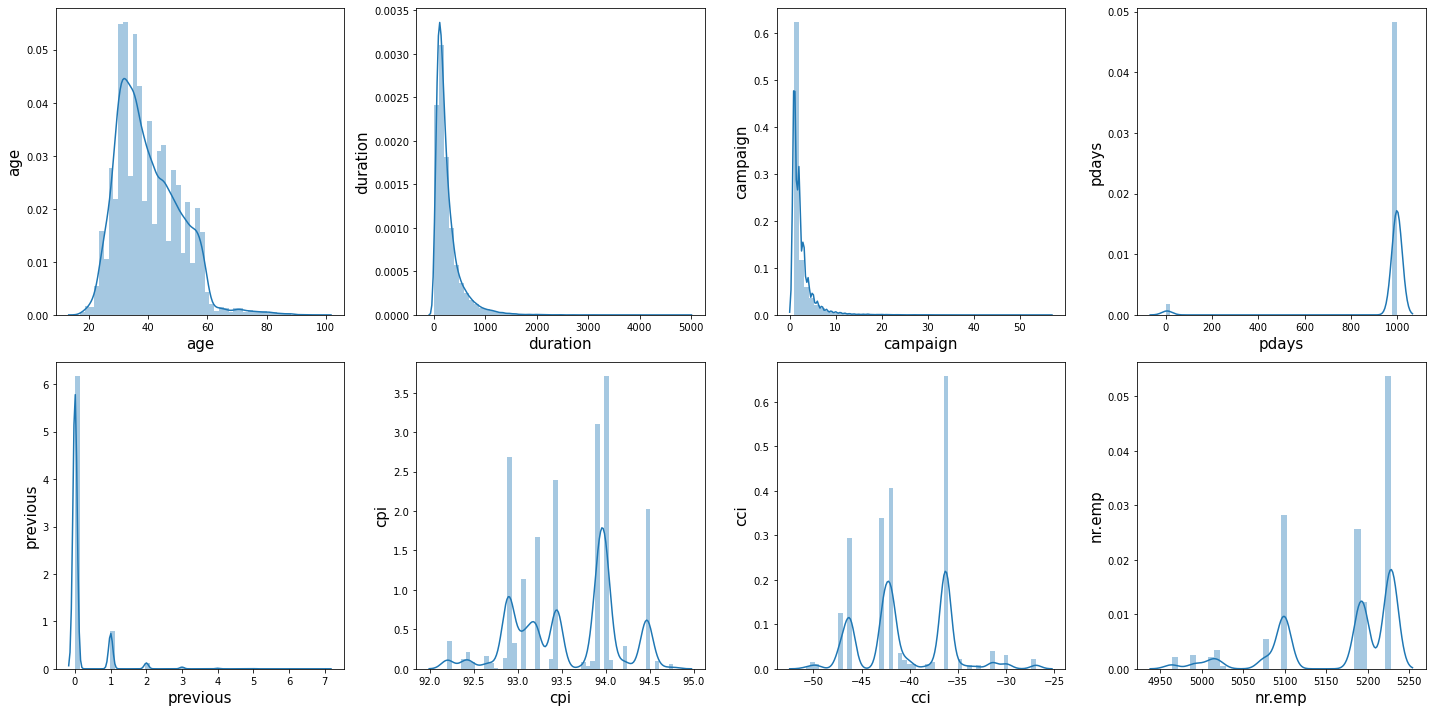

In [235]:
#visualize data with dist plot
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()
    plt.xlabel(nums[i],fontsize=15)
    plt.ylabel(nums[i],fontsize=15)

- Positively skewed: pdays, nr.emp, cci
- Negatively skewed: age, duration campaign, previous, cpi

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

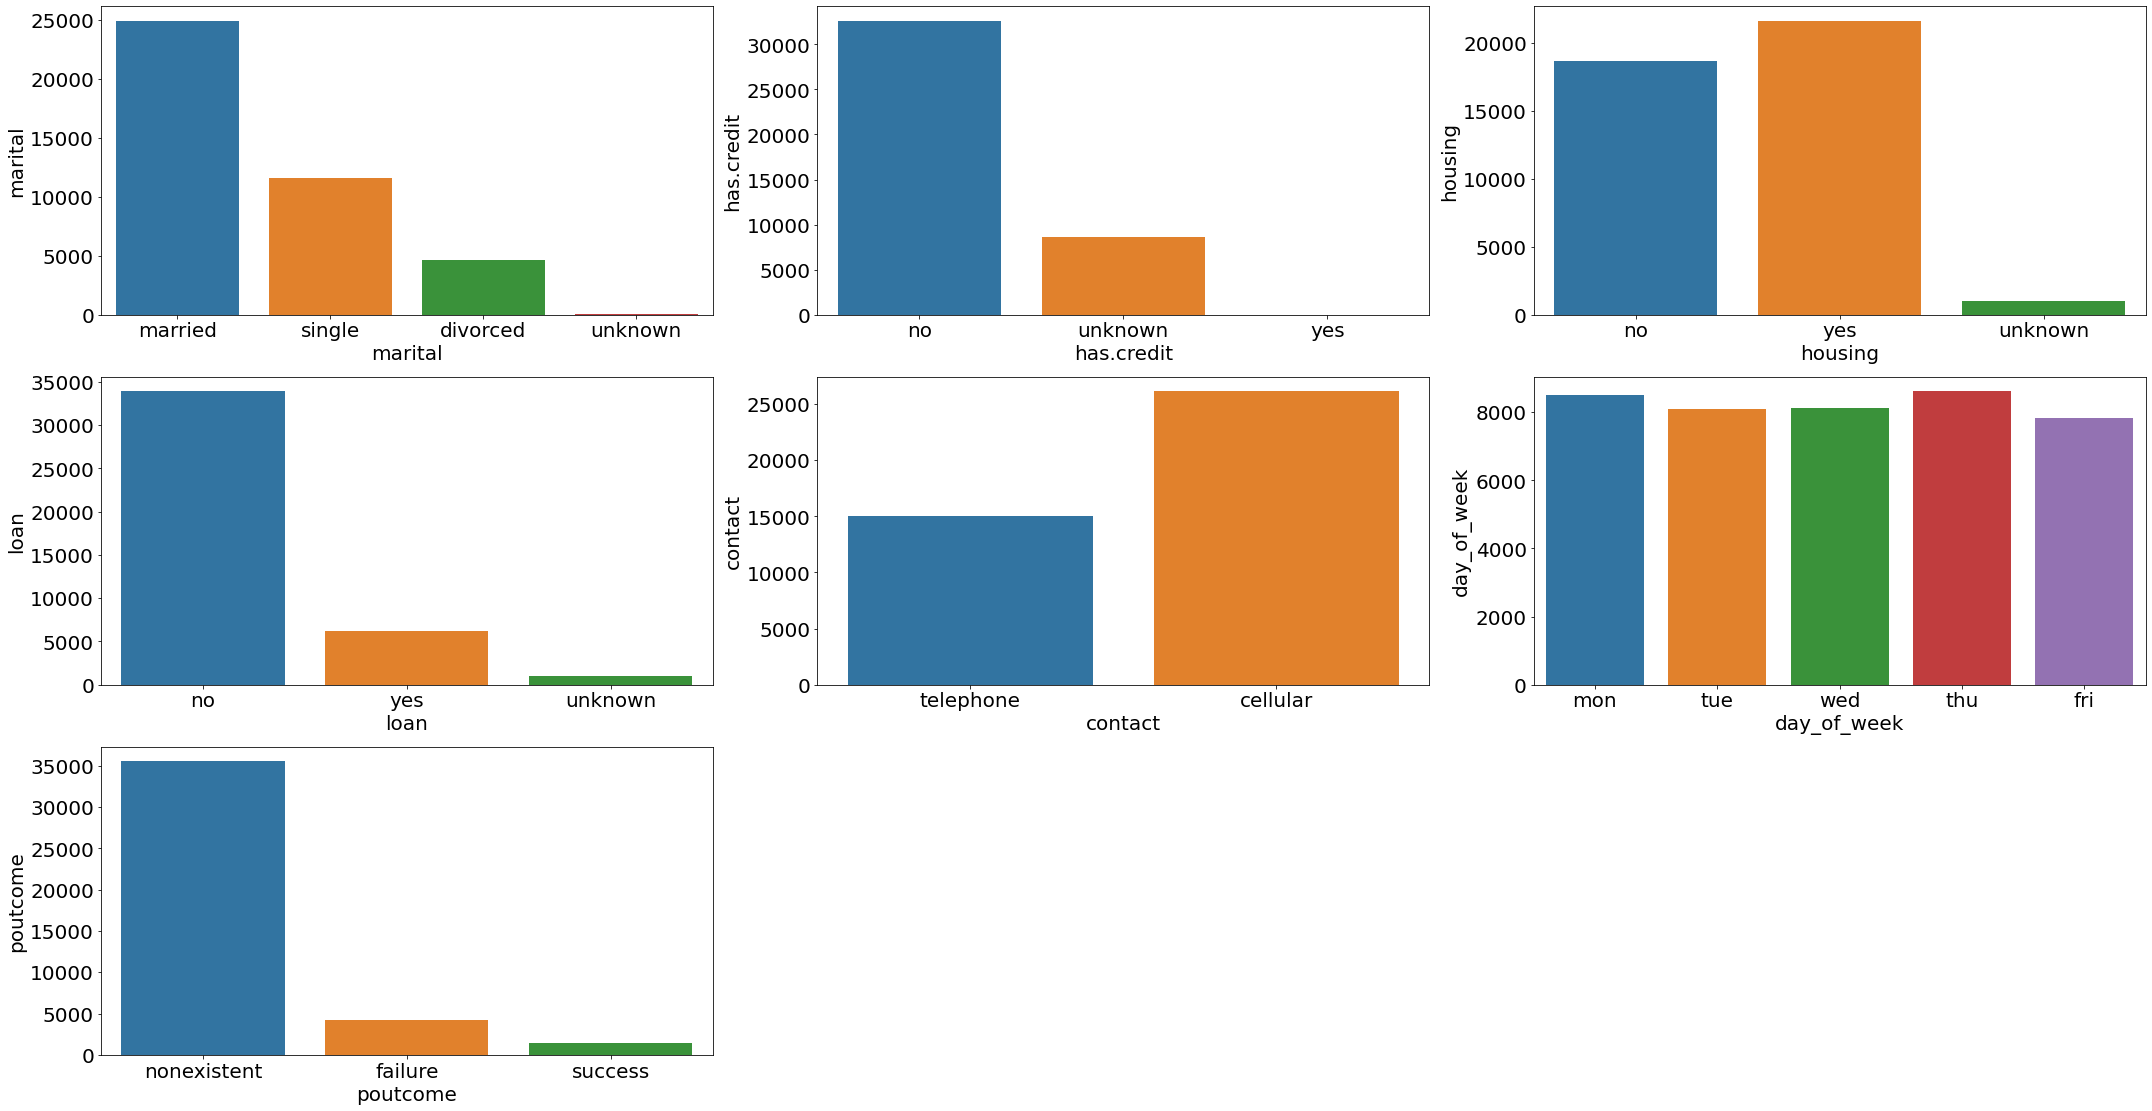

In [236]:
#create cats columns
cats=df.select_dtypes(include=['object'])
cats=cats.drop(columns=['subs.td','month','education','job']).columns

#create countplot
plt.figure(figsize=(30, 20))
for i in range(0, len(cats)):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[cats[i]], orient='v')
    plt.tight_layout()
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel(cats[i],fontsize=20)
    plt.ylabel(cats[i],fontsize=20)     

- Most of the clients are married
- Most of the clients does not have credit default
- The total Clients that have and does not have housing loans is almost the same
- Most of the clients does not have personal credit
- More clients was contacted via cellular phones
- All clients are contacted on weekdays, and almost every day have the same calls
- Most of the outcome of the contact is nonexistent, and has very low succes

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

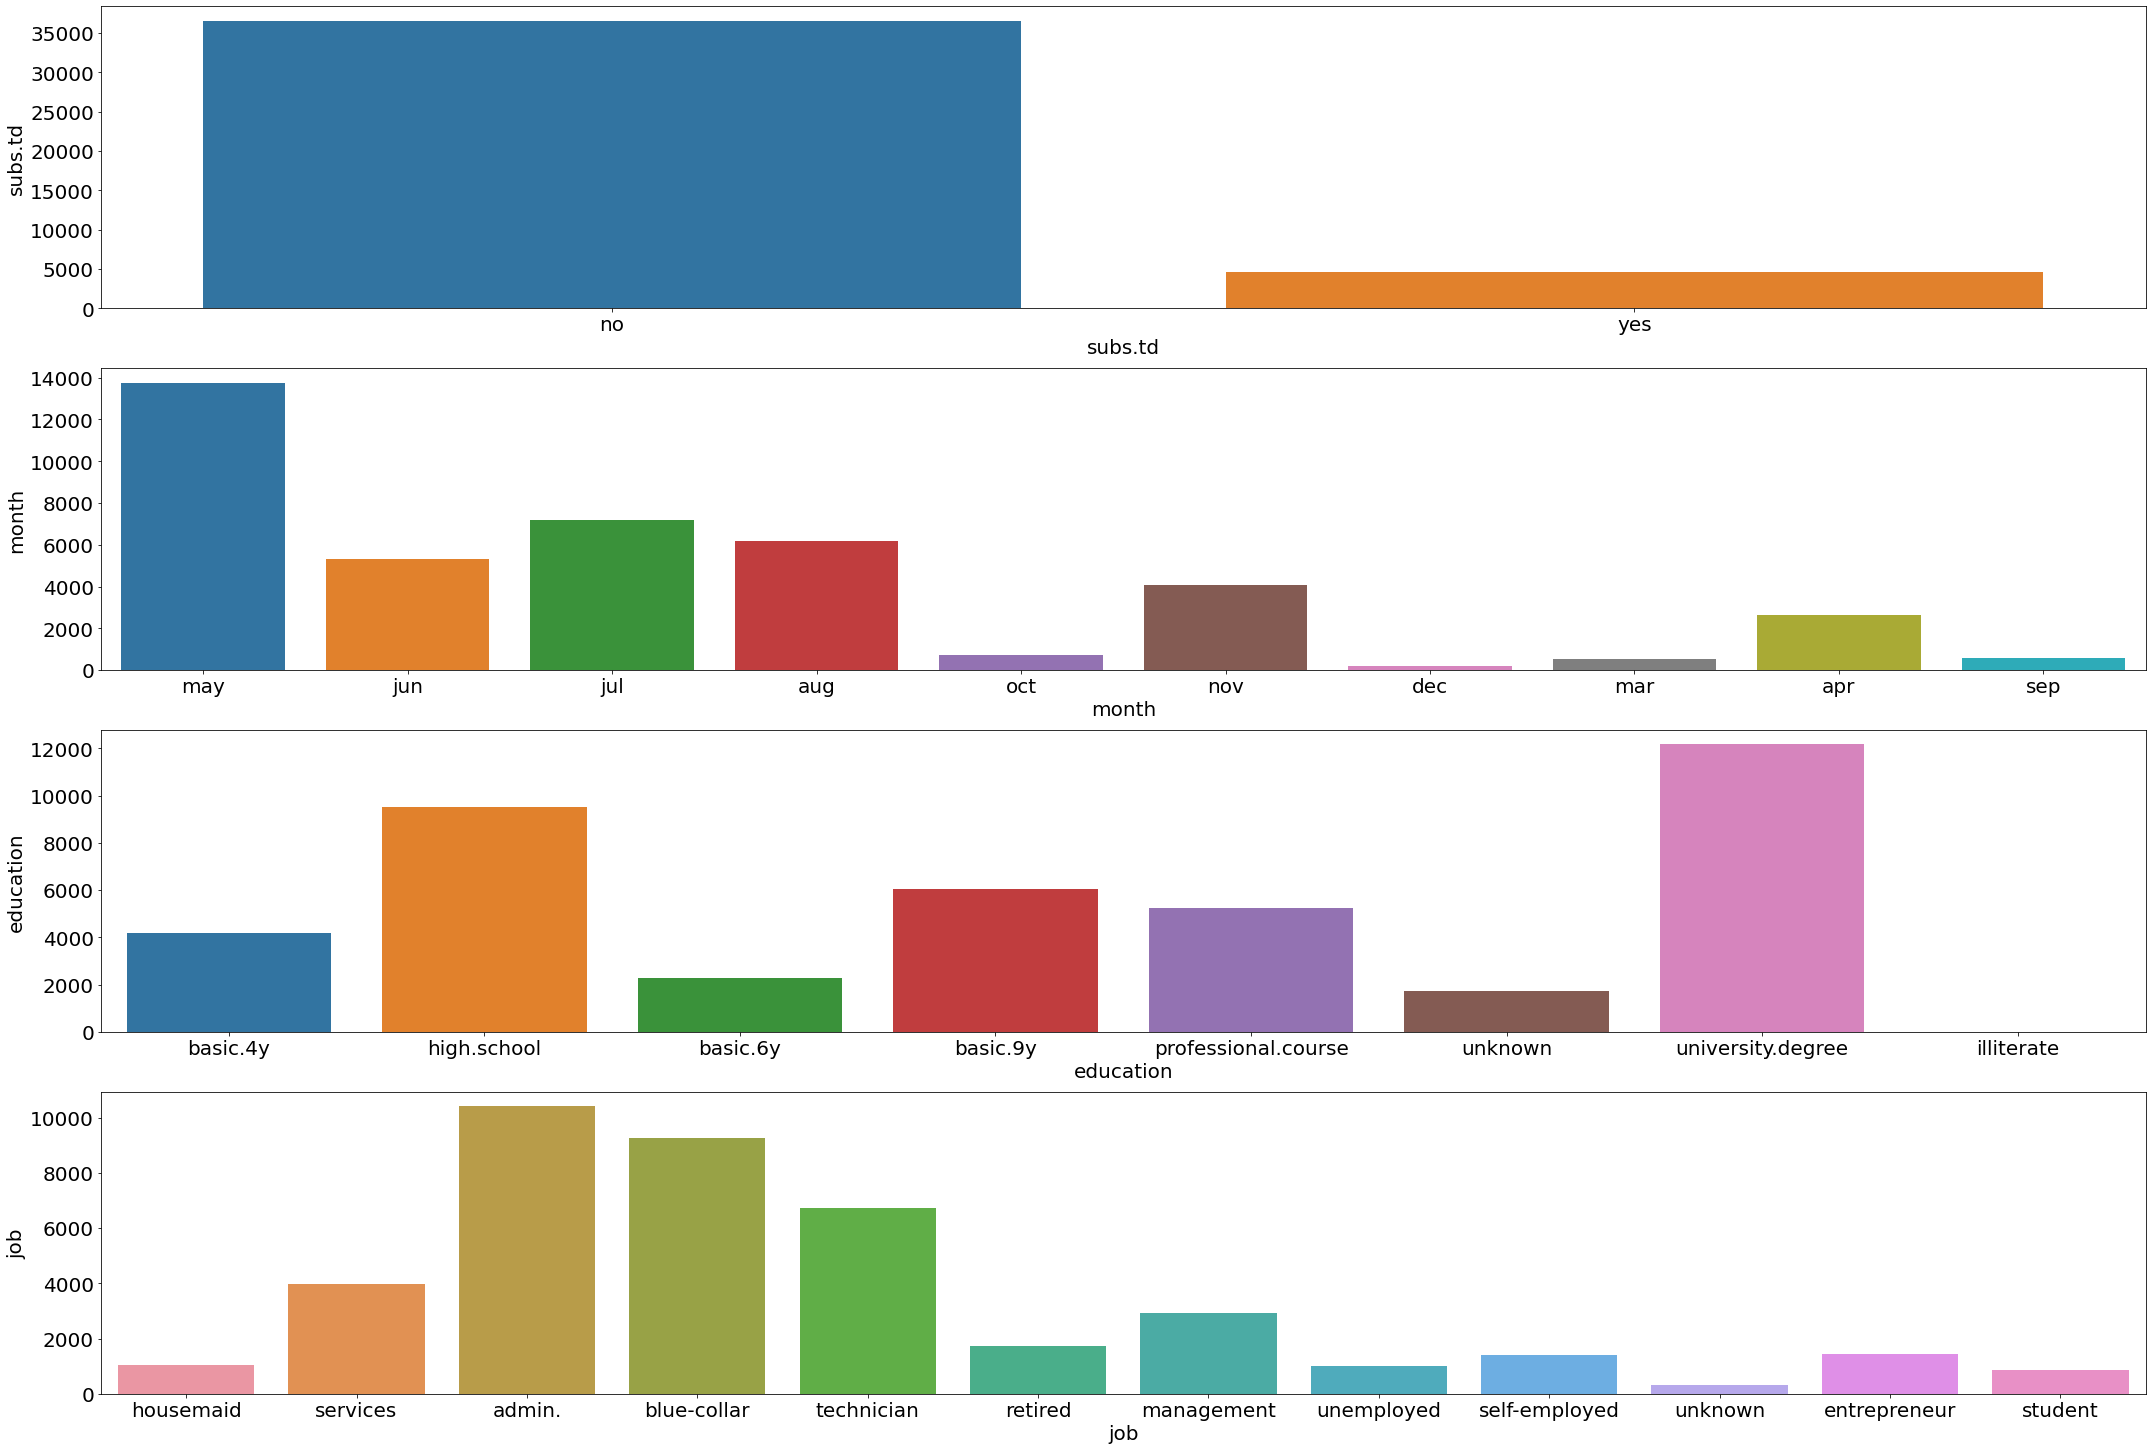

In [237]:
#create cats columns
cats2=['subs.td','month','education','job']

#create countplot
plt.figure(figsize=(30, 20))
for i in range(0, len(cats2)):
    plt.subplot(4, 1, i+1)
    sns.countplot(df[cats2[i]], orient='v')
    plt.tight_layout()
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel(cats2[i],fontsize=20)
    plt.ylabel(cats2[i],fontsize=20)   

- Most of the clients does not subscribe term deposit
- Most of the clients education is University degree, high school, and basic 9 year.
- Most of the clients jobs is admins, blue-collar, and technician.
- Most of the clients was contacted on May, July, and August

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subs.td', ylabel='count'>

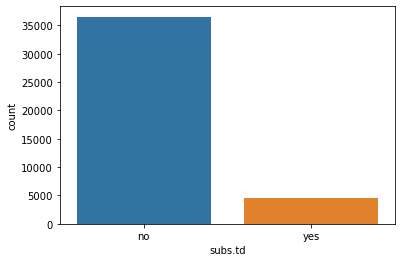

In [238]:
#view target data
sns.countplot(df['subs.td'])

- The clients that does not subscribe to term deposit is 35000
- While the clients tha does subscribe to term deposit is around 5k, or 1/7 of people that does not deposit

In [239]:
#create grouping for married and education
dfm=df.groupby(['marital','education']).count()[['age']]
dfm=dfm.sort_values('age',ascending=False).rename(columns={'age':'count'}).reset_index()
dfm.head()

,marital,education,count
0,married,university.degree,6391
1,married,high.school,5157
2,single,university.degree,4405
3,married,basic.9y,4156
4,married,basic.4y,3228


- Top 3 clients based on Marital and Education is Married with University degree, Married with Highschool degree, and Single with University degree

In [240]:
#create grouping for married and education
dfe=df.groupby(['education','has.credit']).count()[['age']]
dfe=dfe.sort_values('age',ascending=False).rename(columns={'age':'count'}).reset_index()
dfe.head()

,education,has.credit,count
0,university.degree,no,10714
1,high.school,no,7902
2,professional.course,no,4433
3,basic.9y,no,4418
4,basic.4y,no,2477


- Top 3 clients based on education and has credit default is University degree, high school, professional course, and all of them does not have credit default

In [241]:
#create grouping for married and education
dfj=df.groupby(['job','housing']).count()[['age']]
dfj=dfj.sort_values('age',ascending=False).rename(columns={'age':'count'}).reset_index()
dfj.head()

,job,housing,count
0,admin.,yes,5558
1,blue-collar,yes,4710
2,admin.,no,4634
3,blue-collar,no,4303
4,technician,yes,3613


- Top 3 categories based on job and housing is admin with housing loan, blue-collar with housing loan and admin without housing loan

In [242]:
#create grouping for married and education
dfj2=df.groupby(['job','loan']).count()[['age']]
dfj2=dfj2.sort_values('age',ascending=False).rename(columns={'age':'count'}).reset_index()
dfj2.head()

,job,loan,count
0,admin.,no,8482
1,blue-collar,no,7647
2,technician,no,5603
3,services,no,3265
4,management,no,2414


- Top 3 categories based on job and personal loan is admin, blue-collar, technician and all of them does not have personal loan.

In [243]:
#create grouping for married and education
dfc=df.groupby(['poutcome']).sum()[['campaign']]
dfc=dfc.sort_values('campaign',ascending=False).rename(columns={'campaign':'campaign_total'}).reset_index()
dfc

,poutcome,campaign_total
0,nonexistent,94726
1,failure,8526
2,success,2483


- most of the outcome of the calls is nonexistent
- the succes calls of the clients is very low

In [244]:
#create grouping for married and education
dfstd=df.groupby(['subs.td']).sum()[['campaign']]
dfstd=dfstd.sort_values('campaign',ascending=False).rename(columns={'campaign':'campaign_total'}).reset_index()
dfstd

,subs.td,campaign_total
0,no,96216
1,yes,9519


- The clients who was not subscribed is much bigger than thoose who subscribed

In [245]:
#create grouping for married and education
dfcp=df.groupby(['contact','poutcome']).count()[['age']]
dfcp=dfcp.sort_values('age',ascending=False).rename(columns={'age':'campaign_total'}).reset_index()
dfcp.head()

,contact,poutcome,campaign_total
0,cellular,nonexistent,20913
1,telephone,nonexistent,14638
2,cellular,failure,3952
3,cellular,success,1270
4,telephone,failure,300


- The top 3 categories based on contact line and outcome is mostly nonexistent/failure, this is bad.

In [246]:
#create group by duration, but dividided by minutes
dfd=df.groupby(pd.cut(df["duration"]/60, np.arange(0, 100, 5))).count()[['age']]
dfd=dfd.rename(columns={'age':'minutes'}).reset_index()
dfd.head()

,duration,minutes
0,"(0, 5]",29970
1,"(5, 10]",7738
2,"(10, 15]",2183
3,"(15, 20]",768
4,"(20, 25]",307


- most of the call lasted between 0 to 5 minutes
- followed by 5 - 10 minutes and 10 - 15 minutes

In [247]:
#group by cpi
dfcpi=df.groupby(pd.cut(df["cpi"], np.arange(90, 100, 2))).count()[['age']]
dfcpi=dfcpi.rename(columns={'age':'count'}).reset_index()
dfcpi

,cpi,count
0,"(90, 92]",0
1,"(92, 94]",35394
2,"(94, 96]",5782
3,"(96, 98]",0


- Most of the CPI of the clients are 92- 94, and followed by 94-96.

In [248]:
#group by cci
dfcci=df.groupby(pd.cut(df["cci"], np.arange(-50, -25, 5))).count()[['age']]
dfcci=dfcci.rename(columns={'age':'count'}).reset_index()
dfcci

,cci,count
0,"(-50, -45]",8464
1,"(-45, -40]",15975
2,"(-40, -35]",13700
3,"(-35, -30]",1914


- Most of the cci of the clients are between -45 to -40, and followed by -40 to -35

In [249]:
#group by number of employess
dfnre=df.groupby(pd.cut(df["nr.emp"], np.arange(4800, 5300, 100))).count()[['age']]
dfnre=dfnre.rename(columns={'age':'count'}).reset_index()
dfnre

,nr.emp,count
0,"(4800, 4900]",0
1,"(4900, 5000]",1408
2,"(5000, 5100]",12086
3,"(5100, 5200]",11454


- Most of the client employes is between 5000- 5100 employees and 5100 to 5200 employees

In [250]:
dfage=df.groupby(pd.cut(df["age"], np.arange(10, 110, 10))).count()[['age']]
dfage=dfage.rename(columns={'age':'count'}).reset_index()
dfage

,age,count
0,"(10, 20]",140
1,"(20, 30]",7241
2,"(30, 40]",16380
3,"(40, 50]",10237
4,"(50, 60]",6269
5,"(60, 70]",488
6,"(70, 80]",302
7,"(80, 90]",109
8,"(90, 100]",10


- The client's age is mostly around 30-40, 40,50, and 20-30

In [251]:
#create grouping for married and education
dfmonth=df.groupby(['month','subs.td']).sum()[['campaign']]
dfmonth=dfmonth.sort_values('month',ascending=True).rename(columns={'campaign':'campaign_total'}).reset_index()
dfmonth.sort_values(by='campaign_total',ascending=False).head()

,month,subs.td,campaign_total
12,may,no,31703
6,jul,no,20976
9,jun,no,15103
2,aug,no,15010
14,nov,no,7144


- Top 3 most of the clients contacted are on month may, july and june, while all of them does not subs to term deposit.

In [252]:
#create grouping by contact
dfct=df.groupby(['contact']).count()[['age']]
dfct=dfct.rename(columns={'age':'count'}).reset_index()
dfct

,contact,count
0,cellular,26135
1,telephone,15041


- Most of the calls is from cellular phone

In [253]:
#create new category by age
conditions=[
    (df['age']>=10) & (df['age'] <= 20),
    (df['age']>20) & (df['age'] <=30),
    (df['age']>30) & (df['age']<=40),
    (df['age']>40) & (df['age']<=50),
    (df['age']>50) & (df['age']<=60),
    (df['age']>60) & (df['age']<=70),
    (df['age']>70) & (df['age']<=80),
    (df['age']>80) & (df['age']<=90),
    (df['age']>90) & (df['age']<=100)
]

outputs = [
    '10, 20',
    '21, 30', 
    '31, 40', 
    '41, 50',
    '51, 60', 
    '61, 70', 
    '71, 80', 
    '81, 90',
    '91,100'
]

res = np.select(conditions, outputs, 'Other')

In [254]:
#create new group by category
dftf=df.copy()
dftf['age_class']=res

In [255]:
#create new group by category
dfagec=dftf.groupby(['age_class','subs.td']).count()[['age']]
dfagec=dfagec.rename(columns={'age':'count'}).reset_index()
dfagec.sort_values(by=['subs.td','count'],ascending=False)

,age_class,subs.td,count
5,"31, 40",yes,1597
3,"21, 30",yes,1067
7,"41, 50",yes,836
9,"51, 60",yes,668
11,"61, 70",yes,212
13,"71, 80",yes,143
1,"10, 20",yes,57
15,"81, 90",yes,54
17,"91,100",yes,5
4,"31, 40",no,14783


- Top 3 term deposit subscriber are clients that have an age around the age 31 - 40, 21 - 30, and 41 - 50
- Bottom 3 term deposit subscriber are clients that have an age around 10 - 20, 81 - 90, and 91 -100
- Top 3 term deposit non subscriber are clients that have an age around the age 31 - 40, 41 - 50, and 21 - 30
- Bottom 3 term deposit non subscriber are clients that have an age around 10 - 20, 81 - 90, and 91 -100

## Data Exploration Summary:

- Almost all numerical features have an outliers
- Some of the outliers are positive or negatively skewed, apa benar?
- Almost all of our client have no default credit
- Almost all of our clients are married and single
- Most of our clients does not have personal loan
- But on housing loan, the number of clients that have housing loan is bigger than thoose who not, even though the difference is not big
- Most of the contacts was done through client's cellular phone
- The outcome of the calls was dominated by nonexistent outcome
- Most of the calls was done on May, July, August and June.
- Most of our clients education are University degree, High School, and basic 9 year.
- Most of our client jobs are admins, blue-collars, and Technicians.
- Most of our clinets does not subscribed to Term Deposit.

# 6. Data Preprocessing

## Label Encoding Target Data

In [256]:
#label encoding target data
dfc=df.copy()

lb_make = LabelEncoder()
dfc["subs.td"] = lb_make.fit_transform(dfc["subs.td"])

Text(0.5, 1.0, 'Features Correlating with Term Deposit Subscription')

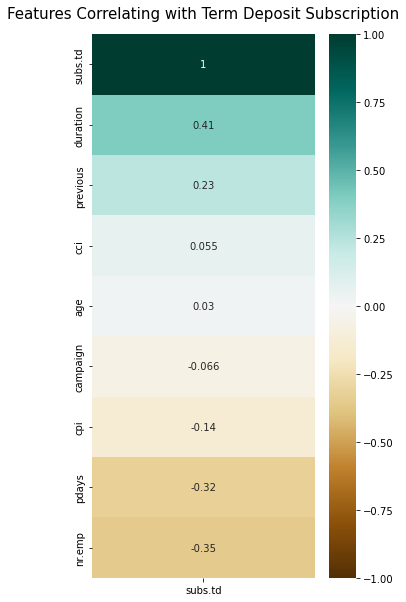

In [257]:
#view correlation with target
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(dfc.corr()[['subs.td']].sort_values(by='subs.td', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Term Deposit Subscription', fontdict={'fontsize':15}, pad=16)

- All of the features have decent correlation with the target features

In [258]:
#replace value
dfc['pdays'].replace({999:-1},inplace=True)

- Replace 999 with -1, so that the computer does not think 999 is very high, and we will have a good scale of standardization too

In [259]:
#drop columns that i will not remove outliers
cols=dfc.select_dtypes(['int64','float64']).drop(columns=['pdays','previous']).columns

- Dropping theese 2 columns from removing the outliers, becaus if i include it, i will lose most of the information from theese 2 features

In [260]:
# Remove outlier outside 1,5 IQR for train data (x)


print(f'Jumlah baris sebelum memfilter outlier: {len(dfc)}')

filtered_entries = np.array([True] * len(dfc))
for col in range(len(cols)):
    Q1 = dfc[cols[col]].quantile(0.25)
    Q3 = dfc[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((dfc[cols[col]] >= low_limit) & (dfc[cols[col]] <= high_limit)) & filtered_entries
    
dfo = dfc[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 41176
Jumlah baris setelah memfilter outlier: 35165


## One Hot Encoding Categorical Data

In [261]:
#one hot encoding categorical variables:
dfo=pd.get_dummies(dfo)

In [262]:
#check columns after encoding
dfo.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cpi', 'cci',
       'nr.emp', 'subs.td', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'has.credit_no',
       'has.credit_unknown', 'has.credit_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [263]:
#separate target and features
x=dfo.drop(columns=['subs.td'])
y=dfo['subs.td']

In [264]:
#split dataset
xtrain,xtest, ytrain, ytest= train_test_split(x,y, train_size=0.7, random_state=42, stratify = y)

In [265]:
#create general pipeline
scale=Pipeline([("standard", StandardScaler())])

In [266]:
#fit transform xtrain and fit xtest
xtrain_scaled=scale.fit_transform(xtrain) #train data
xtest_scaled=scale.transform(xtest) #test data

In [267]:
#check shape
print(xtrain_scaled.shape)
print(xtest_scaled.shape)

(24615, 61)
(10550, 61)


# 7. Define Model

In [268]:
#define models
lr=LogisticRegression()
svc=SVC()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
knn=KNeighborsClassifier()
bayes=GaussianNB()
xgb=XGBClassifier()

- The Above model was choosen because the target features is a categorical features
- The Focus on this model is Accuracy and Precision, because we wanted to reduce False Positives.
- The False positives means that a customer that is not subscribed is predicted as subscribed.

# 8. Train Model

In [269]:
#fit model
lr.fit(xtrain_scaled,ytrain)
svc.fit(xtrain_scaled,ytrain)
tree.fit(xtrain_scaled,ytrain)
forest.fit(xtrain_scaled,ytrain)
knn.fit(xtrain_scaled,ytrain)
bayes.fit(xtrain_scaled,ytrain)
xgb.fit(xtrain_scaled,ytrain)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:
#define statified k fold for later purposes
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(xtrain,ytrain)

5

# 9. Evaluate Model

### Logistic Regression Standard

In [271]:
#predict train and test data
ypred_train_log = lr.predict(xtrain_scaled)
ypred_test_log=lr.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9731
           1       0.65      0.38      0.48       819

    accuracy                           0.94     10550
   macro avg       0.80      0.68      0.72     10550
weighted avg       0.93      0.94      0.93     10550

ROC AUC: 0.6834185750535561
Accuracy Score Train: 0.9387365427584806
Accuracy Score Test: 0.9358293838862559
Precision Score Train: 0.6700421940928271
Precision Score Test: 0.6454918032786885
F-1Score: 0.4820198928844683


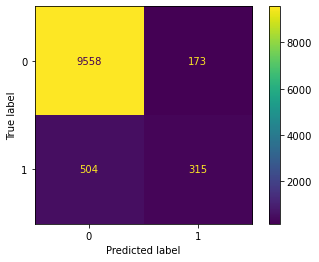

In [272]:
#model evaluation
print(classification_report(ytest, ypred_test_log))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_log))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_log))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_log))
print('Precision Score Train:',precision_score(ytrain, ypred_train_log))
print('Precision Score Test:',precision_score(ytest, ypred_test_log))
print('F-1Score:', f1_score(ytest, ypred_test_log))

plot_confusion_matrix(lr, xtest_scaled, ytest)

- The ROC AUC Score is 0.68, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and the value is Quite high.
- The Test Precision is slightly lower than the train data, meaning there is more False Positive on the predictions.
- The F1 Score is closer to 0 than to 1

### Stratified K Fold LR

In [273]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("logreg", lr)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.93682713792403, 0.9394678041844404, 0.9366240097501524, 0.9386552914889296, 0.9360146252285192]


0.9375177737152143

- The mean from the accuracy values from each fold is not far from the standard logistic regression accuracy.
- This means that high accuracy on the standard logistic regression is not just a coincidence

### SVM Standard

In [274]:
#predict train and test data
ypred_train_svc = svc.predict(xtrain_scaled)
ypred_test_svc=svc.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9731
           1       0.66      0.33      0.44       819

    accuracy                           0.93     10550
   macro avg       0.80      0.66      0.70     10550
weighted avg       0.92      0.93      0.92     10550

ROC AUC: 0.6565234226831185
Accuracy Score Train: 0.95214300223441
Accuracy Score Test: 0.9346919431279621
Precision Score Train: 0.861796643632774
Precision Score Test: 0.6600985221674877
F-1Score: 0.43755102040816324


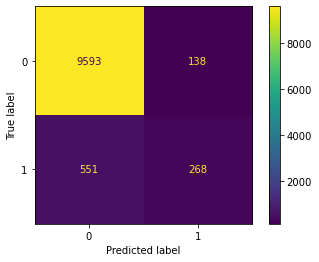

In [275]:
#model evaluation
print(classification_report(ytest, ypred_test_svc))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_svc))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_svc))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_svc))
print('Precision Score Train:',precision_score(ytrain, ypred_train_svc))
print('Precision Score Test:',precision_score(ytest, ypred_test_svc))
print('F-1Score:', f1_score(ytest, ypred_test_svc))

plot_confusion_matrix(svc, xtest_scaled, ytest)

- The ROC AUC Score is 0.65, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and the value is Quite high.
- The Test Precision is 0,2 points lower than the train data, meaning there is more False Positive on the predictions.
- The F1 Score is closer to 0 than to 1

### Stratified K Fold SVM

In [276]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("svm", svc)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.9345927280113752, 0.9372333942717855, 0.9347958561852528, 0.9384521633150518, 0.9360146252285192]


0.9362177534023969

- The mean from the accuracy values from each fold is not far from the standard SVM accuracy.
- This means that high accuracy on the standard SVM is not just a coincidence

### Decision Tree Standard

In [277]:
#predict train and test data
ypred_train_tree = tree.predict(xtrain_scaled)
ypred_test_tree=tree.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9731
           1       0.46      0.48      0.47       819

    accuracy                           0.92     10550
   macro avg       0.71      0.72      0.71     10550
weighted avg       0.92      0.92      0.92     10550

ROC AUC: 0.7163876156271594
Accuracy Score Train: 1.0
Accuracy Score Test: 0.9151658767772511
Precision Score Train: 1.0
Precision Score Test: 0.45601851851851855
F-1Score: 0.4682115270350565


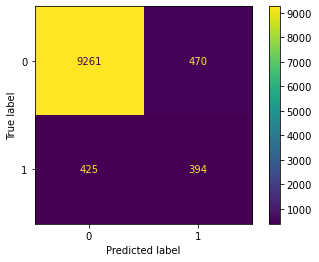

In [278]:
#model evaluation
print(classification_report(ytest, ypred_test_tree))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_tree))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_tree))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_tree))
print('Precision Score Train:',precision_score(ytrain, ypred_train_tree))
print('Precision Score Test:',precision_score(ytest, ypred_test_tree))
print('F-1Score:', f1_score(ytest, ypred_test_tree))

plot_confusion_matrix(tree, xtest_scaled, ytest)

- The ROC AUC Score is 0.71, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and the value is Quite high.
- The Test Precision is very low than the train data, meaning there is more False Positive on the predictions.
- The F1 Score is closer to 0 than to 1

### Stratified K Fold Decision Tree

In [279]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("tree", tree)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.9150924233191143, 0.9179362177534024, 0.9120455007109486, 0.9171237050578915, 0.9126548852325818]


0.9149705464147878

- The mean from the accuracy values from each fold is not far from the standard Decision Tree accuracy.
- This means that high accuracy on the standard Decision Tree is not just a coincidence

### Random Forest Standard

In [280]:
#predict train and test data
ypred_train_forest = forest.predict(xtrain_scaled)
ypred_test_forest=forest.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9731
           1       0.65      0.41      0.50       819

    accuracy                           0.94     10550
   macro avg       0.80      0.69      0.73     10550
weighted avg       0.93      0.94      0.93     10550

ROC AUC: 0.6942534395005877
Accuracy Score Train: 1.0
Accuracy Score Test: 0.9372511848341232
Precision Score Train: 1.0
Precision Score Test: 0.6542239685658153
F-1Score: 0.5015060240963854


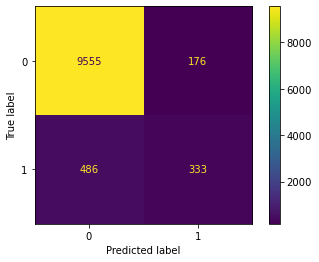

In [281]:
#model evaluation
print(classification_report(ytest, ypred_test_forest))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_forest))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_forest))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_forest))
print('Precision Score Train:',precision_score(ytrain, ypred_train_forest))
print('Precision Score Test:',precision_score(ytest, ypred_test_forest))
print('F-1Score:', f1_score(ytest, ypred_test_forest))

plot_confusion_matrix(forest, xtest_scaled, ytest)

- The ROC AUC Score is 0.7, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and the value is Quite high.
- The Test Precision is very low than the train data, meaning there is more False Positive on the predictions.
- The F1 Score is closer to 0 than to 1

### Stratified K Fold Random Forest

In [282]:
#check accuracy for each fold
for train_index,test_index in skf.split(xtrain,ytrain) :
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("forest", forest)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)
    

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.9150924233191143, 0.9179362177534024, 0.9120455007109486, 0.9171237050578915, 0.9126548852325818, 0.941905342270973, 0.9390615478366849, 0.9390615478366849, 0.9427178549664839, 0.9410928295754621]


0.9278691854560227

- The mean from the accuracy values from each fold is not far from the standard Random Forest accuracy.
- This means that high accuracy on the standard Random Forest is not just a coincidence

### KNN Standard

In [283]:
#predict train and test data
ypred_train_knn = knn.predict(xtrain_scaled)
ypred_test_knn=knn.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9731
           1       0.56      0.32      0.41       819

    accuracy                           0.93     10550
   macro avg       0.75      0.65      0.68     10550
weighted avg       0.91      0.93      0.92     10550

ROC AUC: 0.6491609020126129
Accuracy Score Train: 0.9462522851919561
Accuracy Score Test: 0.9272985781990521
Precision Score Train: 0.753448275862069
Precision Score Test: 0.5550847457627118
F-1Score: 0.4058869093725794


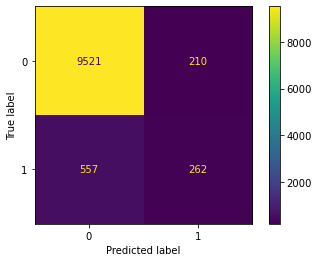

In [284]:
#model evaluation
print(classification_report(ytest, ypred_test_knn))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_knn))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_knn))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_knn))
print('Precision Score Train:',precision_score(ytrain, ypred_train_knn))
print('Precision Score Test:',precision_score(ytest, ypred_test_knn))
print('F-1Score:', f1_score(ytest, ypred_test_knn))

plot_confusion_matrix(knn, xtest_scaled, ytest)

- The ROC AUC Score is 0.64, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and the value is Quite high.
- The Test Precision is slightly lower than the train data, meaning there is more False Positive on the predictions.
- The F1 Score is closer to 0 than to 1

### Stratified K Fold KNN

In [285]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("knn", knn)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.9299207800121877, 0.9345927280113752, 0.931139549055454, 0.9317489335770871, 0.9272801137517773]


0.9309364208815761

- The mean from the accuracy values from each fold is not far from the standard KNN accuracy.
- This means that high accuracy on the standard KNN is not just a coincidence

### Naive Bayes Standard

In [286]:
#predict train and test data
ypred_train_nb = bayes.predict(xtrain_scaled)
ypred_test_nb=bayes.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9731
           1       0.25      0.79      0.38       819

    accuracy                           0.80     10550
   macro avg       0.61      0.79      0.63     10550
weighted avg       0.92      0.80      0.84     10550

ROC AUC: 0.7933842838785804
Accuracy Score Train: 0.8016250253910218
Accuracy Score Test: 0.8003791469194312
Precision Score Train: 0.2554312047399605
Precision Score Test: 0.2499028371550719
F-1Score: 0.37912735849056606


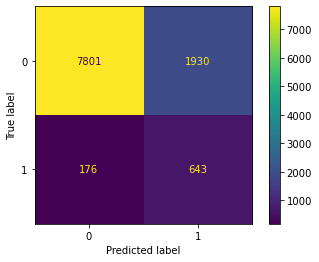

In [287]:
#model evaluation
print(classification_report(ytest, ypred_test_nb))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_nb))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_nb))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_nb))
print('Precision Score Train:',precision_score(ytrain, ypred_train_nb))
print('Precision Score Test:',precision_score(ytest, ypred_test_nb))
print('F-1Score:', f1_score(ytest, ypred_test_nb))

plot_confusion_matrix(bayes, xtest_scaled, ytest)

- The ROC AUC Score is 0.79, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and relatively low compared to other models, and the value is Quite high.
- The Test Precision is slightly lower than the train data, and the value is very low.
- The F1 Score is closer to 0 than to 1, and relatively low compared to other models

### Stratified K Fold Naive Bayes

In [288]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    print('Train', train_index,'validation',test_index)
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("bayes", bayes)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

Train [ 4887  4888  4889 ... 24612 24613 24614] validation [   0    1    2 ... 5268 5275 5279]
Train [    0     1     2 ... 24612 24613 24614] validation [ 4887  4888  4889 ... 10461 10462 10480]
Train [    0     1     2 ... 24612 24613 24614] validation [ 9789  9790  9791 ... 15079 15080 15094]
Train [    0     1     2 ... 24612 24613 24614] validation [14745 14746 14747 ... 20245 20249 20278]
Train [    0     1     2 ... 20245 20249 20278] validation [19652 19653 19654 ... 24612 24613 24614]
[0.8021531586431038, 0.7986999796871826, 0.8108876701198456, 0.7936217753402397, 0.7873248019500305]


0.7985374771480804

- The mean from the accuracy values from each fold is not far from the standard Naive Bayes accuracy.
- This means that high accuracy on the standard Naive Bayes is not just a coincidence
- Naive bayes have the lowest performing accuracy

### XGBoost Standard

In [289]:
#predict train and test data
ypred_train_xgb =xgb.predict(xtrain_scaled)
ypred_test_xgb=xgb.predict(xtest_scaled)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9731
           1       0.62      0.44      0.51       819

    accuracy                           0.94     10550
   macro avg       0.78      0.71      0.74     10550
weighted avg       0.93      0.94      0.93     10550

ROC AUC: 0.7076601107019358
Accuracy Score Train: 0.9786715417428398
Accuracy Score Test: 0.9351658767772512
Precision Score Train: 0.9408396946564885
Precision Score Test: 0.6157804459691252
F-1Score: 0.5121255349500713


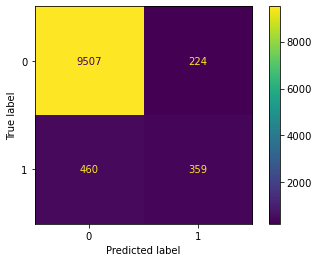

In [290]:
#model evaluation
print(classification_report(ytest, ypred_test_xgb))
print('ROC AUC:',roc_auc_score(ytest, ypred_test_xgb))
print('Accuracy Score Train:',accuracy_score(ytrain, ypred_train_xgb))
print('Accuracy Score Test:',accuracy_score(ytest, ypred_test_xgb))
print('Precision Score Train:',precision_score(ytrain, ypred_train_xgb))
print('Precision Score Test:',precision_score(ytest, ypred_test_xgb))
print('F-1Score:', f1_score(ytest, ypred_test_xgb))

plot_confusion_matrix(xgb, xtest_scaled, ytest)

- The ROC AUC Score is 0.7, this value is above 0.5,but it is still far from 1.
- The Accuracy does not differ much between train and test data, and relatively low compared to other models, and the value is Quite high.
- The Test Precision is largely lower than the train data, and the value is very low.
- The F1 Score is closer to 1 than to 0, but the number is very low.

### Stratified K Fold XGBoost

In [291]:
#check accuracy for each fold
accuracy=[]

for train_index,test_index in skf.split(xtrain,ytrain):
    x1train,x1valid=xtrain.iloc[train_index],xtrain.iloc[test_index]
    y1train,y1valid=ytrain.iloc[train_index],ytrain.iloc[test_index]
    model=Pipeline([("standard", StandardScaler()),("xgb", xgb)])
    model.fit(x1train,y1train)
    y_pred_valid = model.predict(x1valid).reshape(-1,)
    score=accuracy_score(y_pred_valid,y1valid)
    accuracy.append(score)

print(accuracy)  
np.array(accuracy).mean()

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.9396709323583181, 0.93682713792403, 0.9384521633150518, 0.9392646760105626, 0.9372333942717855]


0.9382896607759497

- The mean from the accuracy values from each fold is not far from the standard XGBoost accuracy.
- This means that high accuracy on the standard XGboost is not just a coincidence

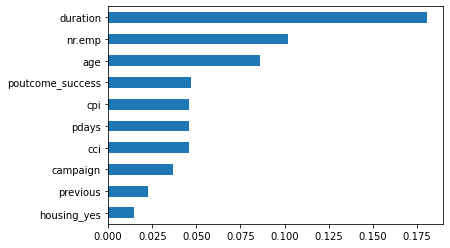

In [292]:
#show top 10 feature importance
feat_importances = pd.Series(forest.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

- The top 3 most affecting features on the predictions is Duration of the calls, Number of Employees and Age.

## Model Insight:

- Random Forest was choosen as the model which we will tune, because:
1. Have the highest Precision from all models.
2. Have a good accuracy relatively compared to other models.
3. Even though it's roc auc score is slightly lower than Decision tree, but its precision is far more better than Decision Tree.
4. Have the best F1 score from all other models.

## Hyperparameter Tuning Random Forest

In [293]:
#define parameters
param_grid = {'forest__max_depth': [8,6,4],
              'forest__min_samples_leaf':[3,5,1]}

In [294]:
#create random forest pipeline
forest_pipe=Pipeline([('scaler',StandardScaler()),('forest',forest)])

In [295]:
# do grid search cross validation
grid = GridSearchCV(forest_pipe, param_grid=param_grid, cv=skf.split(xtrain,ytrain)) #cv = nama variable skf,
grid.fit(xtrain, ytrain)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(xtest, ytest)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.94
Test set score: 0.94
Best parameters: {'forest__max_depth': 8, 'forest__min_samples_leaf': 1}


- The best parameters for depth of the trees is 8
- The best parameters for min sample leaf is 3
- The Accuracy does not differ much from standard random forest

# 10. Model Inference (Random Forest)

In [296]:
#resample new data for inference
xinf,yinf=resample(xtrain_scaled,ytrain,random_state=666)

In [297]:
#state the model with new params

forest2=RandomForestClassifier(max_depth=8,min_samples_leaf=3)

In [298]:
#fit data to model
forest2.fit(xtrain_scaled,ytrain)

RandomForestClassifier(max_depth=8, min_samples_leaf=3)

In [299]:
#predict the validity data
xinf_pred=forest.predict(xinf)

In [300]:
#compare with real data
preds_inf=pd.DataFrame({'Actual':yinf, 'predict':xinf_pred})
preds_inf.sample(10)

,Actual,predict
33134,0,0
12495,0,0
36023,0,0
6273,0,0
37406,1,1
28009,0,0
40251,1,1
394,0,0
7833,0,0
35308,0,0


# 11. Summary

- Out of All models Random forest performs the best Accuracy and Precision
- However, after hyperparemeter tuning, the model does not improve much
- The worst model that performs is Naive Bayes, it has the lowest accuracy and precision compared to all models.
- The best parameter from depth of the tree in random forest is 8.
- The best parameter from min sample leaf in random forest is 3.
- The top 3 most affecting features are: Duration, Number of Employees and Age of the clients.
- XGBoost almost have the same result as Random Forest, however, Random Forest Precision is Better


<b>Decision Making insights:</b>


1. Use Random Forest model to predict the best results
2. Duration, Number of Employees and Age are the most important features , but we can only take control the Duration of the call, so try to play with it because it does have a relatively decent correlation with the target (0.41).
3. Other than duration,pdays, or number of days since last contact with client is also on the top 5 list , so try to play with it because it have a relatively decent correlation with the target (0.28).